In [106]:
import numpy as np
import math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [107]:
df = pd.read_csv("https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [108]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Convert data column to datatime type, then extract year

In [109]:
df['date'] = pd.to_datetime(df['date']) 
df['year'] = df['date'].dt.year 

### Check if there is any null value

In [110]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
dtype: int64

- Replace the sqft_basement with 0 and 1. 0 means no basement. 1 means yes.
- Replace the yr_built with 0 and 1. 0 means no renovation. 1 means yes.

In [111]:
df['basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df['renovation'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df['house_age'] = df['year'] - df['yr_built']

## Data analysis

In [112]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [113]:
df.groupby('zipcode')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
zipcode,,,,,
98001,260000.0,3.0,2.000,1822.0,9287.0
98002,235000.0,3.0,1.750,1570.0,7282.0
98003,267475.0,3.0,2.000,1780.0,8816.0
98004,1150000.0,4.0,2.500,2660.0,11119.0
98005,765475.0,4.0,2.375,2505.0,12220.0
...,...,...,...,...,...
98177,554000.0,3.0,2.000,2120.0,8210.0
98178,278277.0,3.0,1.750,1725.0,7200.0
98188,264000.0,3.0,1.750,1690.0,8913.0


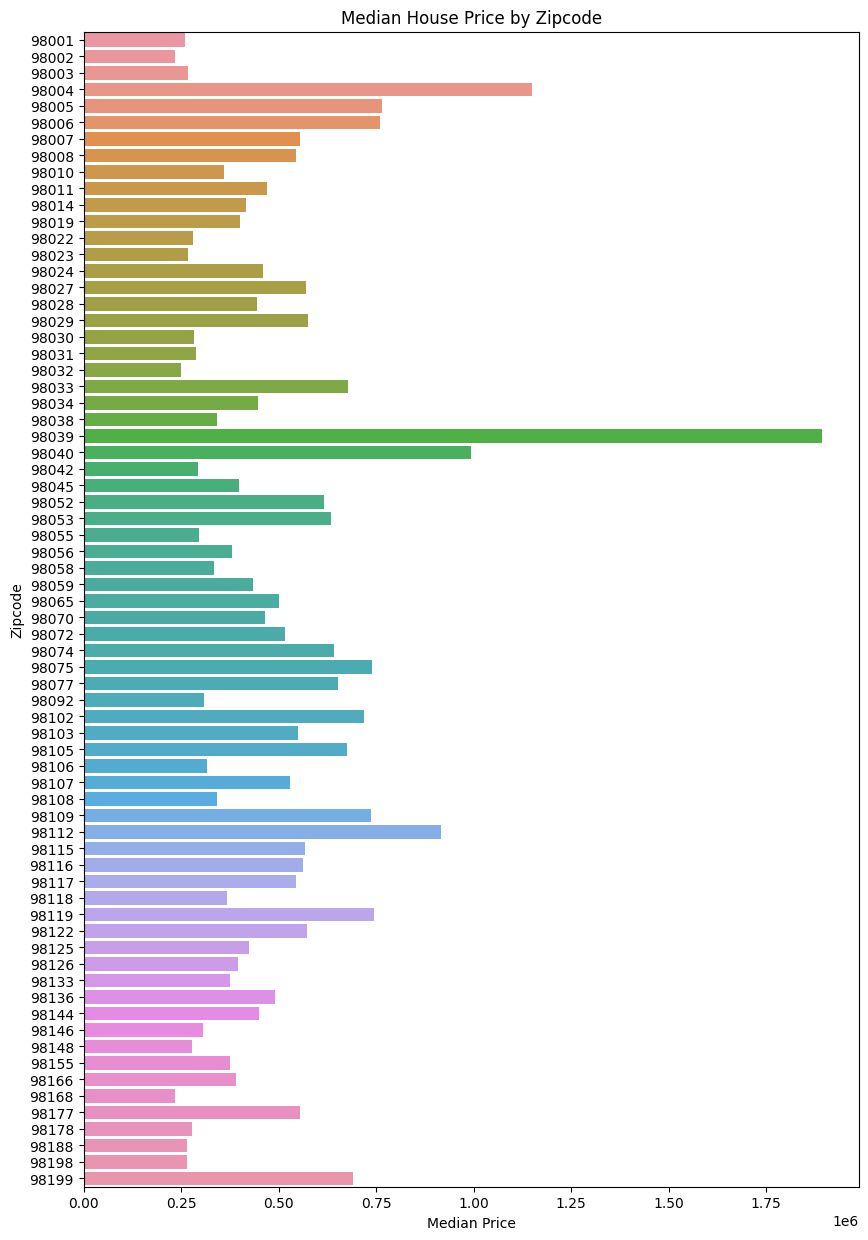

In [114]:
median_price_per_zipcode = df.groupby('zipcode')['price'].median()
median_price_df = median_price_per_zipcode.reset_index()

# Sort the DataFrame by price to make the plot more readable
median_price_df = median_price_df.sort_values('price')

# Create a bar plot
plt.figure(figsize=(10, 15))  # Increase figure size for better visibility
sns.barplot(y='zipcode', x='price', data=median_price_df, orient='h')

plt.title('Median House Price by Zipcode')
plt.xlabel('Median Price')
plt.ylabel('Zipcode')
plt.show()

Floors have not much relevent with price increase/decrease

In [115]:
df.groupby('floors')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
floors,,,,,
1.0,390000.0,3.0,1.750,1630.0,8337.0
1.5,524475.0,3.0,1.750,1760.0,5962.5
2.0,542950.0,4.0,2.500,2440.0,7089.0
2.5,799200.0,4.0,2.500,2850.0,5474.0
3.0,490000.0,3.0,2.500,1500.0,1323.0
3.5,534500.0,3.0,2.625,1730.0,1331.0


In [116]:
df = df.drop(['id', 'date', 'zipcode'], axis=1)
df = df.drop(['year','floors', 'yr_renovated', 'yr_built', 'lat', 'long'], axis=1)

In [117]:
df.groupby('waterfront')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
waterfront,,,,,
0,450000.0,3.0,2.25,1910.0,7588.5
1,1400000.0,3.0,2.50,2850.0,17342.0


In [118]:
df.groupby('view')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
view,,,,,
0,432500.0,3.0,2.25,1850.0,7500.0
1,690944.0,4.0,2.25,2420.0,8734.5
2,675000.0,3.0,2.50,2470.0,8505.0
3,802500.0,4.0,2.50,2840.0,9628.5
4,1185000.0,4.0,2.50,3050.0,13122.0


In [119]:
df.groupby('condition')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
condition,,,,,
1,262500.0,2.0,1.00,1000.0,9300.0
2,279000.0,3.0,1.00,1320.0,8380.0
3,450000.0,3.0,2.50,1970.0,7220.0
4,440000.0,3.0,1.75,1820.0,8530.0
5,526000.0,3.0,2.00,1880.0,7410.0


In [120]:
df.groupby('grade')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
grade,,,,,
1,142000.0,0.0,0.000,290.0,20875.0
3,262000.0,1.0,0.000,600.0,24501.0
4,205000.0,2.0,1.000,660.0,8636.0
5,228700.0,2.0,1.000,905.0,7175.0
6,275276.5,3.0,1.000,1120.0,7196.0
7,375000.0,3.0,1.750,1630.0,7410.0
8,510000.0,3.0,2.500,2150.0,7267.0
9,720000.0,4.0,2.500,2820.0,8160.0
10,914327.0,4.0,2.750,3450.0,11245.0


In [121]:
# Check features
features = list(df.columns.values)
features

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'basement',
 'renovation',
 'house_age']

In [126]:
# Spereate features to numeraical features and categorical features
numerical_features = ['bedrooms', 'bathrooms', 'house_age', 'sqft_basement', 'basement',  'sqft_living15', 'sqft_above', 'sqft_living', 'sqft_lot15', 'sqft_lot']
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'renovation']
print("Total features: {}".format(len(features)))
print("Numberical features: {}".format(len(numerical_features)))
print("Categorical features: {}".format(len(categorical_features)))

Total features: 16
Numberical features: 10
Categorical features: 5


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  sqft_living15  21613 non-null  int64  
 12  sqft_lot15     21613 non-null  int64  
 13  basement       21613 non-null  int64  
 14  renovation     21613 non-null  int64  
 15  house_age      21613 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 2.6 MB


In [125]:
results_1 = ols("price ~ waterfront + view + condition + grade + renovation", data=df).fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5078.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:30:10   Log-Likelihood:            -2.9921e+05
No. Observations:               21613   AIC:                         5.984e+05
Df Residuals:                   21607   BIC:                         5.985e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+06   1.58e+04    -78.325      0.0

In [127]:
results_2 = ols("price ~ bedrooms + bathrooms + house_age + sqft_basement + basement + sqft_living15 + sqft_above + sqft_living + sqft_lot15 + sqft_lot", data=df).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     3129.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:32:53   Log-Likelihood:            -2.9859e+05
No. Observations:               21613   AIC:                         5.972e+05
Df Residuals:                   21603   BIC:                         5.973e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.627e+05   9454.052    -27.791

In [128]:
results_3 = ols("price ~ waterfront + view + condition + grade + renovation + bedrooms + bathrooms + house_age + sqft_basement + basement + sqft_living15 + sqft_above + sqft_living + sqft_lot15 + sqft_lot", data=df).fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2906.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:34:02   Log-Likelihood:            -2.9616e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21598   BIC:                         5.925e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.738e+05    1.7e+04    -57.389

### Check outliers

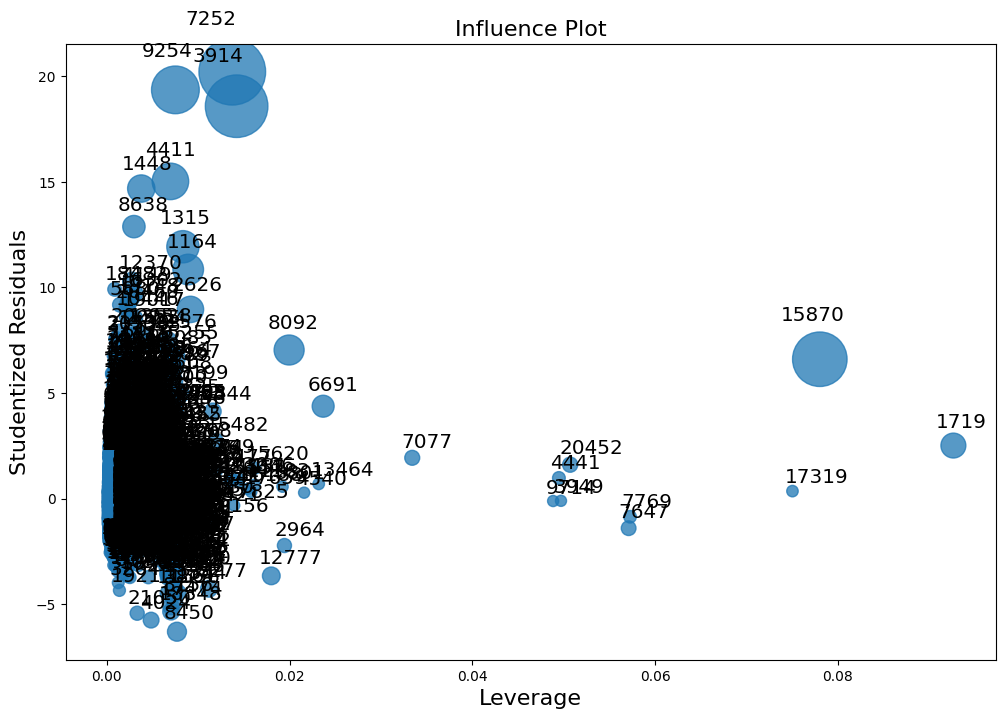

In [130]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results_3, ax=ax, criterion='cooks')

Remove outliers with quartile

In [131]:
df1 = df.copy()
selected_features = ['price', 'sqft_living15', 'sqft_above', 'sqft_living', 'sqft_lot', 'sqft_lot15']
for i in selected_features:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(2.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(2.5*IQR))]
    df1 = df1.reset_index(drop=True)


In [133]:
newresults_3 = ols("price ~ waterfront + view + condition + grade + renovation + bedrooms + bathrooms + house_age + sqft_basement + basement + sqft_living15 + sqft_above + sqft_living + sqft_lot15 + sqft_lot", data=df).fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2906.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:42:43   Log-Likelihood:            -2.9616e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21598   BIC:                         5.925e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.738e+05    1.7e+04    -57.389

In [134]:
TARGET = ['price']
X_train, X_test, y_train, y_test = train_test_split(df1[numerical_features + categorical_features]
                                                    ,df1[TARGET],
                                                    test_size = 0.3, random_state=1234)


In [135]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])


### Linear regression

In [136]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_regression.fit(X_train, y_train)
pred = linear_regression.predict(X_test)
np.sqrt(mean_squared_error(pred,y_test))

145763.31366733104

### Ridge regression

In [137]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])
ridge_regression.fit(X_train, y_train)
pred_ridge = ridge_regression.predict(X_test)
np.sqrt(mean_squared_error(pred_ridge,y_test))

145826.94149584247

### Lasso regression

In [138]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])
lasso_regression.fit(X_train, y_train)
lasso_pred = lasso_regression.predict(X_test)
np.sqrt(mean_squared_error(lasso_pred, y_test))

C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.995e+11, tolerance: 7.304e+10
  model = cd_fast.enet_coordinate_descent(


145784.3076218088

### ElasticNet regression

In [139]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])
elasticnet_regression.fit(X_train, y_train)
elasticnet_pred = elasticnet_regression.predict(X_test)
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

161549.11825637188

### Random Forest

In [140]:
randomforest = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=10))
])
randomforest.fit(X_train, y_train)
rf_pred = randomforest.predict(X_test)
np.sqrt(mean_squared_error(rf_pred, y_test))

C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


141140.09479268466